## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 
### Boston Dataset 

In [3]:
X,Y = bostonDataset.boston_data()
n_features = 13 
n_samples = 506 
n_target = 1 

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.754
Model:                            OLS   Adj. R-squared (uncentered):              0.745
Method:                 Least Squares   F-statistic:                              91.97
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                   3.85e-110
Time:                        10:41:25   Log-Likelihood:                         -292.78
No. Observations:                 404   AIC:                                      611.6
Df Residuals:                     391   BIC:                                      663.6
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

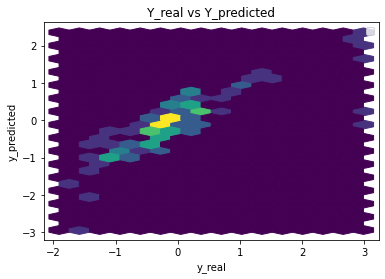

Performance Metrics
Mean Squared Error: 0.3084348712333694
Mean Absolute Error: 0.3255571510436787
Manhattan distance: 33.20682940645522
Euclidean distance: 5.608953277199203


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.18229988514875448


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.033215


0:	learn: 0.9853442	total: 66.5ms	remaining: 1m 6s
1:	learn: 0.9656637	total: 67.4ms	remaining: 33.6s
2:	learn: 0.9448461	total: 68.2ms	remaining: 22.7s
3:	learn: 0.9307380	total: 69ms	remaining: 17.2s
4:	learn: 0.9131481	total: 69.8ms	remaining: 13.9s
5:	learn: 0.8962180	total: 70.6ms	remaining: 11.7s
6:	learn: 0.8791935	total: 71.5ms	remaining: 10.1s
7:	learn: 0.8636324	total: 72.2ms	remaining: 8.95s
8:	learn: 0.8483507	total: 72.9ms	remaining: 8.02s
9:	learn: 0.8316170	total: 73.6ms	remaining: 7.28s
10:	learn: 0.8180557	total: 74.3ms	remaining: 6.68s
11:	learn: 0.8045890	total: 75ms	remaining: 6.18s
12:	learn: 0.7905841	total: 75.8ms	remaining: 5.75s
13:	learn: 0.7757016	total: 76.5ms	remaining: 5.39s
14:	learn: 0.7626228	total: 77.2ms	remaining: 5.07s
15:	learn: 0.7485141	total: 77.9ms	remaining: 4.79s
16:	learn: 0.7371715	total: 78.7ms	remaining: 4.55s
17:	learn: 0.7253721	total: 79.4ms	remaining: 4.33s
18:	learn: 0.7126315	total: 80.3ms	remaining: 4.14s
19:	learn: 0.7003647	total

94:	learn: 0.3208617	total: 141ms	remaining: 1.34s
95:	learn: 0.3190465	total: 142ms	remaining: 1.33s
96:	learn: 0.3171830	total: 142ms	remaining: 1.33s
97:	learn: 0.3151016	total: 143ms	remaining: 1.32s
98:	learn: 0.3135899	total: 145ms	remaining: 1.32s
99:	learn: 0.3119785	total: 145ms	remaining: 1.31s
100:	learn: 0.3099995	total: 146ms	remaining: 1.3s
101:	learn: 0.3081842	total: 147ms	remaining: 1.29s
102:	learn: 0.3067453	total: 148ms	remaining: 1.29s
103:	learn: 0.3046720	total: 149ms	remaining: 1.28s
104:	learn: 0.3033059	total: 149ms	remaining: 1.27s
105:	learn: 0.3018275	total: 150ms	remaining: 1.27s
106:	learn: 0.3000709	total: 151ms	remaining: 1.26s
107:	learn: 0.2979669	total: 152ms	remaining: 1.25s
108:	learn: 0.2965627	total: 153ms	remaining: 1.25s
109:	learn: 0.2955635	total: 154ms	remaining: 1.24s
110:	learn: 0.2938381	total: 154ms	remaining: 1.24s
111:	learn: 0.2924824	total: 155ms	remaining: 1.23s
112:	learn: 0.2909304	total: 156ms	remaining: 1.23s
113:	learn: 0.28963

149:	learn: 0.2532646	total: 188ms	remaining: 1.06s
150:	learn: 0.2525037	total: 189ms	remaining: 1.06s
151:	learn: 0.2518834	total: 190ms	remaining: 1.06s
152:	learn: 0.2508292	total: 191ms	remaining: 1.05s
153:	learn: 0.2499628	total: 191ms	remaining: 1.05s
154:	learn: 0.2492276	total: 192ms	remaining: 1.05s
155:	learn: 0.2482778	total: 193ms	remaining: 1.04s
156:	learn: 0.2474020	total: 194ms	remaining: 1.04s
157:	learn: 0.2463141	total: 195ms	remaining: 1.04s
158:	learn: 0.2452900	total: 195ms	remaining: 1.03s
159:	learn: 0.2447003	total: 196ms	remaining: 1.03s
160:	learn: 0.2439049	total: 197ms	remaining: 1.03s
161:	learn: 0.2430593	total: 198ms	remaining: 1.02s
162:	learn: 0.2422898	total: 199ms	remaining: 1.02s
163:	learn: 0.2414536	total: 200ms	remaining: 1.02s
164:	learn: 0.2409161	total: 201ms	remaining: 1.01s
165:	learn: 0.2403708	total: 202ms	remaining: 1.01s
166:	learn: 0.2393736	total: 203ms	remaining: 1.01s
167:	learn: 0.2387592	total: 204ms	remaining: 1.01s
168:	learn: 

233:	learn: 0.2011297	total: 256ms	remaining: 838ms
234:	learn: 0.2004357	total: 257ms	remaining: 836ms
235:	learn: 0.2002080	total: 258ms	remaining: 836ms
236:	learn: 0.1997277	total: 259ms	remaining: 834ms
237:	learn: 0.1995137	total: 260ms	remaining: 832ms
238:	learn: 0.1989207	total: 261ms	remaining: 830ms
239:	learn: 0.1984731	total: 262ms	remaining: 828ms
240:	learn: 0.1978723	total: 262ms	remaining: 826ms
241:	learn: 0.1972720	total: 263ms	remaining: 824ms
242:	learn: 0.1968294	total: 264ms	remaining: 822ms
243:	learn: 0.1962732	total: 265ms	remaining: 821ms
244:	learn: 0.1958362	total: 266ms	remaining: 821ms
245:	learn: 0.1954467	total: 267ms	remaining: 819ms
246:	learn: 0.1952335	total: 268ms	remaining: 817ms
247:	learn: 0.1947807	total: 269ms	remaining: 816ms
248:	learn: 0.1940779	total: 270ms	remaining: 814ms
249:	learn: 0.1936465	total: 271ms	remaining: 812ms
250:	learn: 0.1931439	total: 272ms	remaining: 810ms
251:	learn: 0.1929172	total: 272ms	remaining: 808ms
252:	learn: 

323:	learn: 0.1677660	total: 331ms	remaining: 690ms
324:	learn: 0.1673943	total: 332ms	remaining: 689ms
325:	learn: 0.1672002	total: 333ms	remaining: 688ms
326:	learn: 0.1668157	total: 334ms	remaining: 686ms
327:	learn: 0.1667371	total: 334ms	remaining: 685ms
328:	learn: 0.1663746	total: 335ms	remaining: 683ms
329:	learn: 0.1662653	total: 336ms	remaining: 682ms
330:	learn: 0.1661748	total: 337ms	remaining: 680ms
331:	learn: 0.1657890	total: 337ms	remaining: 679ms
332:	learn: 0.1656167	total: 338ms	remaining: 677ms
333:	learn: 0.1650904	total: 339ms	remaining: 676ms
334:	learn: 0.1649527	total: 340ms	remaining: 675ms
335:	learn: 0.1645551	total: 341ms	remaining: 673ms
336:	learn: 0.1641196	total: 341ms	remaining: 672ms
337:	learn: 0.1638440	total: 342ms	remaining: 670ms
338:	learn: 0.1634336	total: 344ms	remaining: 670ms
339:	learn: 0.1629284	total: 345ms	remaining: 669ms
340:	learn: 0.1625366	total: 346ms	remaining: 668ms
341:	learn: 0.1622789	total: 346ms	remaining: 667ms
342:	learn: 

379:	learn: 0.1503669	total: 378ms	remaining: 617ms
380:	learn: 0.1500765	total: 379ms	remaining: 616ms
381:	learn: 0.1495638	total: 380ms	remaining: 615ms
382:	learn: 0.1491938	total: 381ms	remaining: 613ms
383:	learn: 0.1489123	total: 381ms	remaining: 612ms
384:	learn: 0.1485069	total: 382ms	remaining: 611ms
385:	learn: 0.1481905	total: 383ms	remaining: 610ms
386:	learn: 0.1478453	total: 384ms	remaining: 608ms
387:	learn: 0.1475369	total: 385ms	remaining: 607ms
388:	learn: 0.1474814	total: 385ms	remaining: 605ms
389:	learn: 0.1470265	total: 386ms	remaining: 604ms
390:	learn: 0.1466204	total: 387ms	remaining: 603ms
391:	learn: 0.1461707	total: 388ms	remaining: 602ms
392:	learn: 0.1458458	total: 389ms	remaining: 601ms
393:	learn: 0.1456188	total: 390ms	remaining: 600ms
394:	learn: 0.1455568	total: 391ms	remaining: 599ms
395:	learn: 0.1451289	total: 392ms	remaining: 597ms
396:	learn: 0.1448974	total: 393ms	remaining: 596ms
397:	learn: 0.1445228	total: 393ms	remaining: 595ms
398:	learn: 

461:	learn: 0.1286555	total: 446ms	remaining: 520ms
462:	learn: 0.1283536	total: 447ms	remaining: 519ms
463:	learn: 0.1281223	total: 448ms	remaining: 518ms
464:	learn: 0.1278582	total: 449ms	remaining: 516ms
465:	learn: 0.1275177	total: 450ms	remaining: 515ms
466:	learn: 0.1272381	total: 450ms	remaining: 514ms
467:	learn: 0.1269674	total: 451ms	remaining: 513ms
468:	learn: 0.1266122	total: 452ms	remaining: 512ms
469:	learn: 0.1263357	total: 453ms	remaining: 511ms
470:	learn: 0.1260287	total: 454ms	remaining: 509ms
471:	learn: 0.1257398	total: 454ms	remaining: 508ms
472:	learn: 0.1254050	total: 455ms	remaining: 507ms
473:	learn: 0.1250764	total: 456ms	remaining: 506ms
474:	learn: 0.1248112	total: 457ms	remaining: 505ms
475:	learn: 0.1244621	total: 458ms	remaining: 504ms
476:	learn: 0.1244261	total: 459ms	remaining: 503ms
477:	learn: 0.1242519	total: 459ms	remaining: 502ms
478:	learn: 0.1240433	total: 460ms	remaining: 500ms
479:	learn: 0.1238622	total: 461ms	remaining: 499ms
480:	learn: 

550:	learn: 0.1110474	total: 521ms	remaining: 425ms
551:	learn: 0.1109686	total: 522ms	remaining: 424ms
552:	learn: 0.1108185	total: 523ms	remaining: 423ms
553:	learn: 0.1106043	total: 524ms	remaining: 422ms
554:	learn: 0.1105033	total: 525ms	remaining: 421ms
555:	learn: 0.1102698	total: 526ms	remaining: 420ms
556:	learn: 0.1100155	total: 527ms	remaining: 419ms
557:	learn: 0.1098471	total: 528ms	remaining: 418ms
558:	learn: 0.1096149	total: 529ms	remaining: 417ms
559:	learn: 0.1095727	total: 530ms	remaining: 416ms
560:	learn: 0.1093512	total: 530ms	remaining: 415ms
561:	learn: 0.1091783	total: 531ms	remaining: 414ms
562:	learn: 0.1089047	total: 532ms	remaining: 413ms
563:	learn: 0.1087061	total: 533ms	remaining: 412ms
564:	learn: 0.1086849	total: 534ms	remaining: 411ms
565:	learn: 0.1086011	total: 534ms	remaining: 410ms
566:	learn: 0.1083325	total: 535ms	remaining: 409ms
567:	learn: 0.1080837	total: 536ms	remaining: 408ms
568:	learn: 0.1079757	total: 537ms	remaining: 407ms
569:	learn: 

607:	learn: 0.1010633	total: 569ms	remaining: 367ms
608:	learn: 0.1008742	total: 570ms	remaining: 366ms
609:	learn: 0.1008524	total: 570ms	remaining: 365ms
610:	learn: 0.1007082	total: 571ms	remaining: 364ms
611:	learn: 0.1005307	total: 572ms	remaining: 363ms
612:	learn: 0.1005154	total: 573ms	remaining: 362ms
613:	learn: 0.1003141	total: 574ms	remaining: 361ms
614:	learn: 0.1002930	total: 574ms	remaining: 360ms
615:	learn: 0.1000684	total: 575ms	remaining: 358ms
616:	learn: 0.0999314	total: 576ms	remaining: 357ms
617:	learn: 0.0997242	total: 577ms	remaining: 357ms
618:	learn: 0.0994978	total: 578ms	remaining: 355ms
619:	learn: 0.0993752	total: 578ms	remaining: 354ms
620:	learn: 0.0992738	total: 579ms	remaining: 354ms
621:	learn: 0.0990402	total: 580ms	remaining: 352ms
622:	learn: 0.0989211	total: 581ms	remaining: 351ms
623:	learn: 0.0987905	total: 582ms	remaining: 350ms
624:	learn: 0.0987728	total: 583ms	remaining: 350ms
625:	learn: 0.0985878	total: 583ms	remaining: 349ms
626:	learn: 

688:	learn: 0.0904962	total: 637ms	remaining: 288ms
689:	learn: 0.0903453	total: 638ms	remaining: 287ms
690:	learn: 0.0901765	total: 639ms	remaining: 286ms
691:	learn: 0.0900351	total: 640ms	remaining: 285ms
692:	learn: 0.0899217	total: 641ms	remaining: 284ms
693:	learn: 0.0898477	total: 642ms	remaining: 283ms
694:	learn: 0.0896256	total: 643ms	remaining: 282ms
695:	learn: 0.0895568	total: 644ms	remaining: 281ms
696:	learn: 0.0893279	total: 644ms	remaining: 280ms
697:	learn: 0.0891642	total: 645ms	remaining: 279ms
698:	learn: 0.0890562	total: 646ms	remaining: 278ms
699:	learn: 0.0890441	total: 647ms	remaining: 277ms
700:	learn: 0.0890252	total: 647ms	remaining: 276ms
701:	learn: 0.0890135	total: 648ms	remaining: 275ms
702:	learn: 0.0888590	total: 649ms	remaining: 274ms
703:	learn: 0.0888470	total: 650ms	remaining: 273ms
704:	learn: 0.0887186	total: 651ms	remaining: 272ms
705:	learn: 0.0884892	total: 652ms	remaining: 271ms
706:	learn: 0.0883517	total: 653ms	remaining: 271ms
707:	learn: 

778:	learn: 0.0804370	total: 711ms	remaining: 202ms
779:	learn: 0.0803019	total: 712ms	remaining: 201ms
780:	learn: 0.0801720	total: 713ms	remaining: 200ms
781:	learn: 0.0801044	total: 714ms	remaining: 199ms
782:	learn: 0.0800920	total: 715ms	remaining: 198ms
783:	learn: 0.0800253	total: 715ms	remaining: 197ms
784:	learn: 0.0797835	total: 716ms	remaining: 196ms
785:	learn: 0.0796680	total: 717ms	remaining: 195ms
786:	learn: 0.0794968	total: 718ms	remaining: 194ms
787:	learn: 0.0793611	total: 718ms	remaining: 193ms
788:	learn: 0.0792346	total: 719ms	remaining: 192ms
789:	learn: 0.0791031	total: 720ms	remaining: 191ms
790:	learn: 0.0790078	total: 721ms	remaining: 190ms
791:	learn: 0.0788565	total: 722ms	remaining: 190ms
792:	learn: 0.0786614	total: 723ms	remaining: 189ms
793:	learn: 0.0784733	total: 724ms	remaining: 188ms
794:	learn: 0.0783430	total: 724ms	remaining: 187ms
795:	learn: 0.0782239	total: 725ms	remaining: 186ms
796:	learn: 0.0781976	total: 726ms	remaining: 185ms
797:	learn: 

837:	learn: 0.0741773	total: 759ms	remaining: 147ms
838:	learn: 0.0740995	total: 760ms	remaining: 146ms
839:	learn: 0.0740280	total: 761ms	remaining: 145ms
840:	learn: 0.0740083	total: 762ms	remaining: 144ms
841:	learn: 0.0739032	total: 762ms	remaining: 143ms
842:	learn: 0.0738437	total: 763ms	remaining: 142ms
843:	learn: 0.0738228	total: 764ms	remaining: 141ms
844:	learn: 0.0737004	total: 765ms	remaining: 140ms
845:	learn: 0.0736111	total: 766ms	remaining: 139ms
846:	learn: 0.0735226	total: 767ms	remaining: 138ms
847:	learn: 0.0734531	total: 767ms	remaining: 138ms
848:	learn: 0.0733977	total: 768ms	remaining: 137ms
849:	learn: 0.0732685	total: 769ms	remaining: 136ms
850:	learn: 0.0731234	total: 770ms	remaining: 135ms
851:	learn: 0.0730106	total: 771ms	remaining: 134ms
852:	learn: 0.0728599	total: 772ms	remaining: 133ms
853:	learn: 0.0727015	total: 773ms	remaining: 132ms
854:	learn: 0.0725520	total: 773ms	remaining: 131ms
855:	learn: 0.0724265	total: 774ms	remaining: 130ms
856:	learn: 

920:	learn: 0.0669429	total: 828ms	remaining: 71ms
921:	learn: 0.0668443	total: 829ms	remaining: 70.1ms
922:	learn: 0.0668336	total: 830ms	remaining: 69.2ms
923:	learn: 0.0668188	total: 830ms	remaining: 68.3ms
924:	learn: 0.0667396	total: 831ms	remaining: 67.4ms
925:	learn: 0.0667234	total: 832ms	remaining: 66.5ms
926:	learn: 0.0666517	total: 833ms	remaining: 65.6ms
927:	learn: 0.0666147	total: 834ms	remaining: 64.7ms
928:	learn: 0.0665323	total: 834ms	remaining: 63.8ms
929:	learn: 0.0664225	total: 835ms	remaining: 62.9ms
930:	learn: 0.0663356	total: 836ms	remaining: 62ms
931:	learn: 0.0663048	total: 837ms	remaining: 61.1ms
932:	learn: 0.0661670	total: 838ms	remaining: 60.2ms
933:	learn: 0.0661162	total: 838ms	remaining: 59.2ms
934:	learn: 0.0661076	total: 839ms	remaining: 58.3ms
935:	learn: 0.0660795	total: 840ms	remaining: 57.4ms
936:	learn: 0.0659922	total: 841ms	remaining: 56.5ms
937:	learn: 0.0658511	total: 842ms	remaining: 55.6ms
938:	learn: 0.0657544	total: 843ms	remaining: 54.7

Mean Squared error 0.13435987535710656


## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 5000
batch_size = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 0.9116583957497606
